In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn
# plt.style.use('seaborn')             ggplot;
import matplotlib as mpl
mpl.rcParams['font.family'] = 'serif'               #解决一些字体显示乱码问题
import warnings; warnings.simplefilter('ignore')       #忽略警告信息；

In [2]:
import numpy as np
import pandas as pd
import tushare as ts

In [3]:
data = ts.get_k_data('600030', start = '2019-01-01', end = '2021-12-31')

本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2


In [4]:
data.head()

,date,open,close,high,low,volume,code
0,2019-01-10,17.15,16.80,17.15,16.75,2186844.0,600030
1,2019-01-11,16.80,16.97,17.03,16.74,1127695.0,600030
2,2019-01-14,17.11,17.00,17.26,16.97,861108.0,600030
3,2019-01-15,17.04,17.60,17.72,17.01,1805469.0,600030
4,2019-01-16,17.63,17.64,17.75,17.48,1104443.0,600030


In [5]:
data.tail()

,date,open,close,high,low,volume,code
718,2021-12-27,25.81,26.00,26.05,25.64,451896.0,600030
719,2021-12-28,26.10,26.05,26.28,25.84,549142.0,600030
720,2021-12-29,26.13,25.88,26.13,25.83,485993.0,600030
721,2021-12-30,25.85,26.37,26.62,25.85,781346.0,600030
722,2021-12-31,26.46,26.41,26.69,26.39,670511.0,600030


In [6]:
data['SMA_20'] = data['close'].rolling(20).mean()

In [7]:
data['SMA_60'] = data['close'].rolling(60).mean()

In [8]:
data.tail()

,date,open,close,high,low,volume,code,SMA_20,SMA_60
718,2021-12-27,25.81,26.00,26.05,25.64,451896.0,600030,25.8435,25.286167
719,2021-12-28,26.10,26.05,26.28,25.84,549142.0,600030,25.9575,25.289333
720,2021-12-29,26.13,25.88,26.13,25.83,485993.0,600030,26.0400,25.293833
721,2021-12-30,25.85,26.37,26.62,25.85,781346.0,600030,26.1385,25.312000
722,2021-12-31,26.46,26.41,26.69,26.39,670511.0,600030,26.2200,25.323000


<AxesSubplot:>

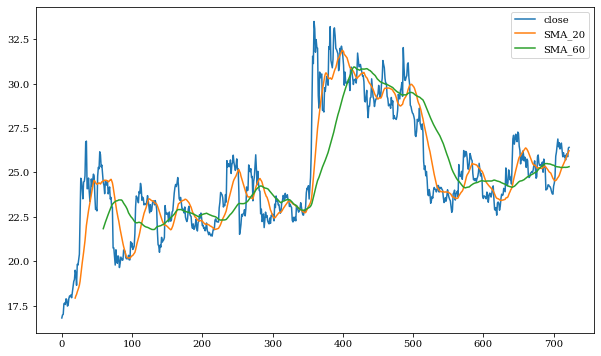

In [9]:
data[['close', 'SMA_20', 'SMA_60']].plot(figsize = (10,6))

In [10]:
#计算股票的return
data['returns'] = np.log(data['close']/data['close'].shift(1))

In [11]:
data['returns_dis'] = data['close'].pct_change()

In [12]:
data.head()

,date,open,close,high,low,volume,code,SMA_20,SMA_60,returns,returns_dis
0,2019-01-10,17.15,16.80,17.15,16.75,2186844.0,600030,NaN,NaN,NaN,NaN
1,2019-01-11,16.80,16.97,17.03,16.74,1127695.0,600030,NaN,NaN,0.010068,0.010119
2,2019-01-14,17.11,17.00,17.26,16.97,861108.0,600030,NaN,NaN,0.001766,0.001768
3,2019-01-15,17.04,17.60,17.72,17.01,1805469.0,600030,NaN,NaN,0.034686,0.035294
4,2019-01-16,17.63,17.64,17.75,17.48,1104443.0,600030,NaN,NaN,0.002270,0.002273


In [13]:
data.tail()

,date,open,close,high,low,volume,code,SMA_20,SMA_60,returns,returns_dis
718,2021-12-27,25.81,26.00,26.05,25.64,451896.0,600030,25.8435,25.286167,0.011995,0.012067
719,2021-12-28,26.10,26.05,26.28,25.84,549142.0,600030,25.9575,25.289333,0.001921,0.001923
720,2021-12-29,26.13,25.88,26.13,25.83,485993.0,600030,26.0400,25.293833,-0.006547,-0.006526
721,2021-12-30,25.85,26.37,26.62,25.85,781346.0,600030,26.1385,25.312000,0.018757,0.018934
722,2021-12-31,26.46,26.41,26.69,26.39,670511.0,600030,26.2200,25.323000,0.001516,0.001517


<AxesSubplot:>

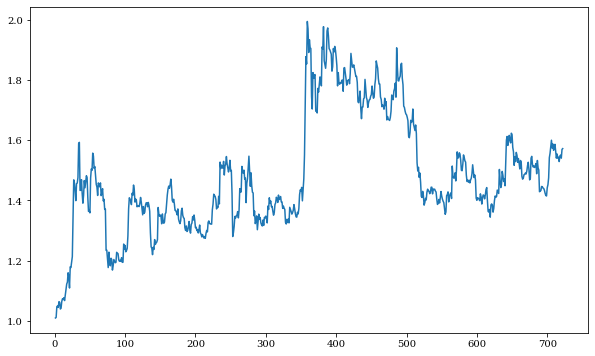

In [14]:
#计算累计收益
data['returns'].cumsum().apply(np.exp).plot(figsize=(10, 6))

<h1>SMA策略</h1>

<h2>准备gomg